## Rozdział 9: Redukcja Wymiarowości Modelu

### 9.1 Wprowadzenie

Redukcja wymiarowości to technika w uczeniu maszynowym polegająca na zmniejszeniu liczby zmiennych wejściowych w zbiorze danych. Jej celem jest uproszczenie modelu, poprawa wydajności obliczeniowej, zmniejszenie ryzyka przeuczenia oraz ułatwienie wizualizacji danych. Redukcja wymiarowości jest szczególnie przydatna w przypadku dużych zbiorów danych z wieloma cechami, gdzie niektóre z nich mogą być nieistotne lub skorelowane.

### 9.2 Metody Redukcji Wymiarowości

#### 9.2.1 Selekcja Cech

Selekcja cech polega na wyborze podzbioru najważniejszych cech ze zbioru danych. Techniki selekcji cech dzielą się na trzy główne kategorie:

- **Metody filtracyjne (Filter Methods):** Ocena cech niezależnie od modelu poprzez miary statystyczne, takie jak korelacja, wartość chi-kwadrat czy wzajemna informacja.
- **Metody osadzane (Embedded Methods):** Wybór cech jest częścią procesu trenowania modelu, na przykład w drzewach decyzyjnych, gdzie niektóre cechy są bardziej wartościowe przy podejmowaniu decyzji.
- **Metody zewnętrzne (Wrapper Methods):** Ocena podzbiorów cech poprzez trenowanie i ocenę modelu na każdym podzbiorze, co jest bardziej obliczeniowo kosztowne.

#### 9.2.2 Ekstrakcja Cech

Ekstrakcja cech polega na przekształceniu oryginalnych cech w nową, mniejszą liczbę cech, które zawierają większość istotnych informacji. Główne techniki ekstrakcji cech to:

- **Analiza Głównych Składowych (PCA - Principal Component Analysis):** Przekształcenie danych na nowy układ współrzędnych, gdzie pierwsze kilka współrzędnych (główne składowe) zachowują większość zmienności danych.
- **Liniowa Analiza Dyskryminacyjna (LDA - Linear Discriminant Analysis):** Technika ekstrakcji cech, która maksymalizuje odległości między klasami, używana głównie do klasyfikacji.
- **Metody nieliniowe:** Takie jak Isomap, t-SNE czy UMAP, które są stosowane do redukcji wymiarowości w sposób zachowujący nieliniowe struktury danych.

### 9.3 Analiza Głównych Składowych (PCA)

#### 9.3.1 Wprowadzenie do PCA

PCA to technika, która przekształca dane na nowy układ współrzędnych, w którym kolejne współrzędne (główne składowe) są ortogonalne i zachowują jak najwięcej zmienności danych. Pierwsza główna składowa zawiera najwięcej zmienności, druga zawiera drugą największą zmienność, i tak dalej.

#### 9.3.2 Algorytm PCA

1. **Standaryzacja Danych:** Przekształcenie danych do postaci ze średnią równą zero i odchyleniem standardowym równym jeden.
2. **Obliczenie Macierzy Kowariancji:** Wyliczenie macierzy kowariancji danych.
3. **Obliczenie Wartości i Wektorów Własnych:** Wyznaczenie wartości własnych i odpowiadających im wektorów własnych macierzy kowariancji.
4. **Sortowanie i Wybór Składowych:** Posortowanie wartości własnych i wybór odpowiadających im wektorów własnych jako głównych składowych.
5. **Przekształcenie Danych:** Przekształcenie oryginalnych danych na wybrane główne składowe.

### 9.4 Przykład Implementacji PCA w Pythonie

Przykładowy kod przedstawiający implementację PCA w Pythonie przy użyciu biblioteki `scikit-learn`.

```python
# Importowanie bibliotek
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Załadowanie przykładowego zbioru danych - Iris
from sklearn.datasets import load_iris
iris = load_iris()

# Konwersja do DataFrame
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Podział danych na cechy (X) i etykiety (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Skalowanie cech
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Wykonanie PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Wyświetlenie wyników PCA
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.legend()
plt.title('PCA - Iris Dataset')
plt.show()
```

### 9.5 Liniowa Analiza Dyskryminacyjna (LDA)

#### 9.5.1 Wprowadzenie do LDA

LDA to technika ekstrakcji cech, która maksymalizuje odległości między klasami poprzez znalezienie nowych osi, które maksymalizują stosunek rozrzutu międzyklasowego do rozrzutu wewnątrzklasowego. LDA jest szczególnie użyteczna w problemach klasyfikacyjnych.

#### 9.5.2 Algorytm LDA

1. **Standaryzacja Danych:** Przekształcenie danych do postaci ze średnią równą zero i odchyleniem standardowym równym jeden.
2. **Obliczenie Średnich Klasowych:** Wyliczenie średnich dla każdej klasy.
3. **Obliczenie Macierzy Rozrzutu:** Wyznaczenie macierzy rozrzutu wewnątrzklasowego i międzyklasowego.
4. **Obliczenie Wartości i Wektorów Własnych:** Wyznaczenie wartości własnych i odpowiadających im wektorów własnych dla macierzy rozrzutu.
5. **Przekształcenie Danych:** Przekształcenie oryginalnych danych na wybrane nowe osie.

### 9.6 Przykład Implementacji LDA w Pythonie

Przykładowy kod przedstawiający implementację LDA w Pythonie przy użyciu biblioteki `scikit-learn`.

```python
# Importowanie bibliotek
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Załadowanie przykładowego zbioru danych - Iris
from sklearn.datasets import load_iris
iris = load_iris()

# Konwersja do DataFrame
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Podział danych na cechy (X) i etykiety (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Skalowanie cech
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Wykonanie LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Wyświetlenie wyników LDA
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], label=target_name)
plt.xlabel('Składowa dyskryminacyjna 1')
plt.ylabel('Składowa dyskryminacyjna 2')
plt.legend()
plt.title('LDA - Iris Dataset')
plt.show()
```

### 9.7 Zalety i Wady Redukcji Wymiarowości

#### 9.7.1 Zalety

- **Zwiększona Wydajność:** Mniej cech oznacza mniej obliczeń, co prowadzi do szybszego trenowania modeli.
- **Zmniejszone Ryzyko Przeuczenia:** Mniej cech oznacza mniej szumów i mniejsze ryzyko przeuczenia modelu.
- **Lepsza Wizualizacja:** Zredukowanie danych do dwóch lub trzech wymiarów umożliwia ich łatwiejszą wiz

ualizację.

#### 9.7.2 Wady

- **Utrata Informacji:** Redukcja wymiarowości może prowadzić do utraty istotnych informacji.
- **Złożoność:** Niektóre techniki redukcji wymiarowości, takie jak metody nieliniowe, mogą być obliczeniowo kosztowne.
- **Interpretowalność:** Wyniki po redukcji wymiarowości mogą być trudniejsze do interpretacji.

### 9.8 Zastosowania Redukcji Wymiarowości

#### 9.8.1 Kompresja Danych

Redukcja wymiarowości jest często stosowana do kompresji danych, co umożliwia przechowywanie i przetwarzanie dużych zbiorów danych w bardziej efektywny sposób.

#### 9.8.2 Przetwarzanie Obrazów

W przetwarzaniu obrazów techniki redukcji wymiarowości są używane do zmniejszenia liczby pikseli, co umożliwia szybsze i bardziej efektywne przetwarzanie obrazów.

#### 9.8.3 Genomika

W genomice redukcja wymiarowości jest wykorzystywana do analizy danych genetycznych, gdzie liczba zmiennych (genów) jest znacznie większa niż liczba próbek.

### 9.9 Zakończenie

Redukcja wymiarowości jest kluczową techniką w uczeniu maszynowym, która umożliwia uproszczenie modeli, zwiększenie wydajności obliczeniowej oraz zmniejszenie ryzyka przeuczenia. Dzięki różnorodnym technikom, takim jak selekcja cech i ekstrakcja cech, można skutecznie zarządzać dużymi zbiorami danych i uzyskać bardziej efektywne modele predykcyjne. Choć ma swoje wady, redukcja wymiarowości pozostaje niezastąpionym narzędziem w arsenale analityka danych.

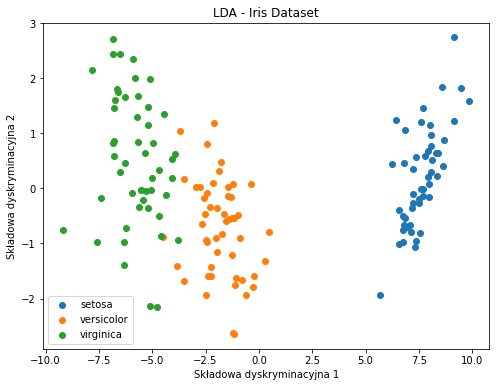

In [1]:
# Importowanie bibliotek
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Załadowanie przykładowego zbioru danych - Iris
from sklearn.datasets import load_iris
iris = load_iris()

# Konwersja do DataFrame
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Podział danych na cechy (X) i etykiety (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Skalowanie cech
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Wykonanie LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Wyświetlenie wyników LDA
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], label=target_name)
plt.xlabel('Składowa dyskryminacyjna 1')
plt.ylabel('Składowa dyskryminacyjna 2')
plt.legend()
plt.title('LDA - Iris Dataset')
plt.show()
